In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage,fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans, vq

In [2]:
df = pd.read_csv('https://s3grouparmenia.s3.eu-central-1.amazonaws.com/Transcripts_with_sentiment_topic')

In [3]:
# Keep only speeches with the dominant topic of israel-palestine.
df_palestina = df[df['dominant_topic'] == 5]

In [4]:
# Normalize before grouping ? or should we do this after grouping
df_palestina['scaled_polarity'] = whiten(df_palestina['polarity'])
df_palestina['scaled_subjectivity'] = whiten(df_palestina['subjectivity'])
df_palestina['scaled_pos'] = whiten(df_palestina['pos'])
df_palestina['scaled_neg'] = whiten(df_palestina['neg'])
df_palestina['scaled_neu'] = whiten(df_palestina['neu'])

C:\Users\david\anaconda3\envs\mda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\david\anaconda3\envs\mda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\david\anaconda3\envs\mda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [5]:
variables = ['scaled_polarity','scaled_subjectivity','scaled_pos','scaled_neg','scaled_neu']

<h2> [1970,1980[ </h2>

In [6]:
df_1970_1980 = df_palestina[df_palestina['Year_x'] < 1980]
df_1970_1980.shape

(158, 18)

In [7]:
grouped_df_1970_1980 = df_1970_1980.groupby(['Country_x'])[variables].mean()

In [8]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 7)
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(grouped_df_1970_1980[variables], i)
    distortions.append(distortion)

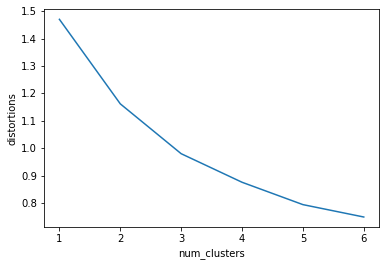

In [9]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()

In [10]:
cluster_centers,_ = kmeans(grouped_df_1970_1980[variables],2)

In [11]:
grouped_df_1970_1980['cluster_labels_1'], _ = vq(grouped_df_1970_1980[variables],cluster_centers)

<AxesSubplot:xlabel='cluster_labels_1'>

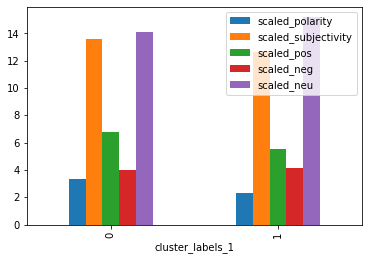

In [12]:
grouped_df_1970_1980.groupby('cluster_labels_1')[variables].mean().plot(kind='bar')

<h2> [1980,1990[ </h2>

In [13]:
df_1980_1990 = df_palestina[(df_palestina['Year_x'] >= 1980) & (df_palestina['Year_x'] < 1990) ]
df_1980_1990.shape

(169, 18)

In [14]:
grouped_df_1980_1990 = df_1980_1990.groupby(['Country_x'])[variables].mean()

In [15]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 7)
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(grouped_df_1980_1990[variables], i)
    distortions.append(distortion)

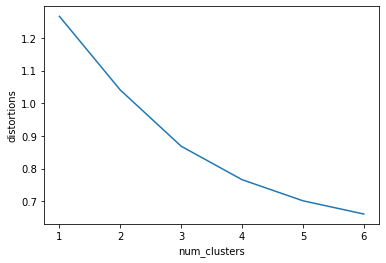

In [16]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()

In [17]:
cluster_centers,_ = kmeans(grouped_df_1980_1990[variables],2)
grouped_df_1980_1990['cluster_labels_2'], _ = vq(grouped_df_1980_1990[variables],cluster_centers)

<AxesSubplot:xlabel='cluster_labels_2'>

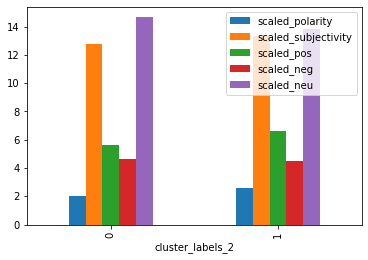

In [18]:
grouped_df_1980_1990.groupby('cluster_labels_2')[variables].mean().plot(kind='bar')

<h2> [1990,2000[ </h2>

In [19]:
df_1990_2000 = df_palestina[(df_palestina['Year_x'] >= 1990) & (df_palestina['Year_x'] < 2000) ]
df_1990_2000.shape

(64, 18)

In [20]:
grouped_df_1990_2000 = df_1990_2000.groupby(['Country_x'])[variables].mean()

In [21]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 7)
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(grouped_df_1990_2000[variables], i)
    distortions.append(distortion)

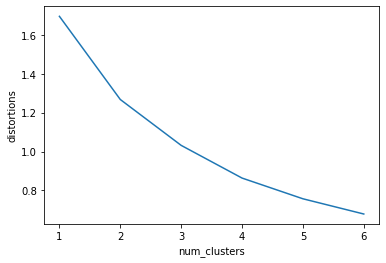

In [22]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()

In [23]:
cluster_centers,_ = kmeans(grouped_df_1990_2000[variables],2)
grouped_df_1990_2000['cluster_labels_3'], _ = vq(grouped_df_1990_2000[variables],cluster_centers)

<AxesSubplot:xlabel='cluster_labels_3'>

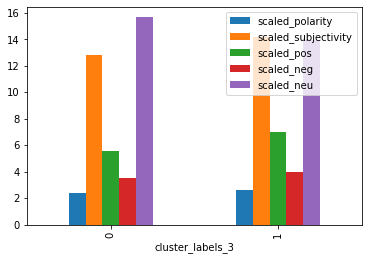

In [24]:
grouped_df_1990_2000.groupby('cluster_labels_3')[variables].mean().plot(kind='bar')

<h2> [2000,2010[ </h2>

In [25]:
df_2000_2010 = df_palestina[(df_palestina['Year_x'] >= 2000) & (df_palestina['Year_x'] < 2010) ]
df_2000_2010.shape

(50, 18)

In [26]:
grouped_df_2000_2010 = df_2000_2010.groupby(['Country_x'])[variables].mean()

In [27]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 7)
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(grouped_df_2000_2010[variables], i)
    distortions.append(distortion)

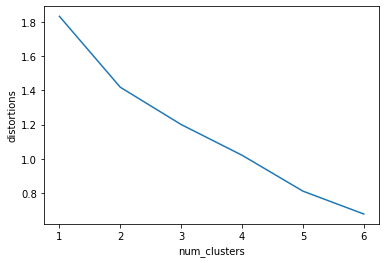

In [28]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()

In [29]:
cluster_centers,_ = kmeans(grouped_df_2000_2010[variables],2)
grouped_df_2000_2010['cluster_labels_4'], _ = vq(grouped_df_2000_2010[variables],cluster_centers)

<AxesSubplot:xlabel='cluster_labels_4'>

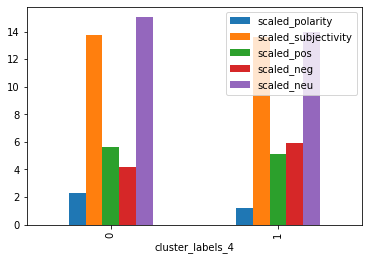

In [30]:
grouped_df_2000_2010.groupby('cluster_labels_4')[variables].mean().plot(kind='bar')

<h2> [2010,...[ </h2>

In [31]:
df_2010_current = df_palestina[df_palestina['Year_x'] >= 2010]
df_2010_current.shape

(52, 18)

In [32]:
grouped_df_2010_current = df_2010_current.groupby(['Country_x'])[variables].mean()

In [33]:
# Declaring variables for use
distortions = []
num_clusters = range(1, 7)
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(grouped_df_2010_current[variables], i)
    distortions.append(distortion)

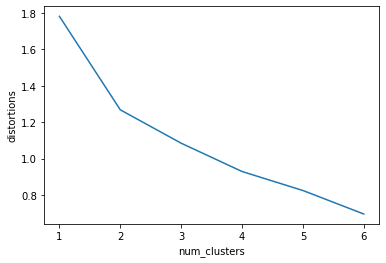

In [34]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()

In [35]:
cluster_centers,_ = kmeans(grouped_df_2010_current[variables],2)
grouped_df_2010_current['cluster_labels_5'], _ = vq(grouped_df_2010_current[variables],cluster_centers)

<AxesSubplot:xlabel='cluster_labels_5'>

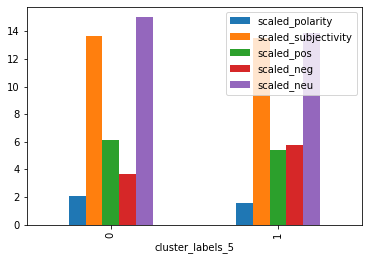

In [36]:
grouped_df_2010_current.groupby('cluster_labels_5')[variables].mean().plot(kind='bar')

<h3> Merge it </h3>

In [37]:
grouped_df_1970_1980['country'] = grouped_df_1970_1980.index
grouped_df_1980_1990['country'] = grouped_df_1980_1990.index
grouped_df_1990_2000['country'] = grouped_df_1990_2000.index
grouped_df_2000_2010['country'] = grouped_df_2000_2010.index
grouped_df_2010_current['country'] = grouped_df_2010_current.index
grouped_df_1970_1980 = grouped_df_1970_1980[['cluster_labels_1','country']]
grouped_df_1980_1990 = grouped_df_1980_1990[['cluster_labels_2','country']]
grouped_df_1990_2000 = grouped_df_1990_2000[['cluster_labels_3','country']]
grouped_df_2000_2010= grouped_df_2000_2010[['cluster_labels_4','country']]
grouped_df_2010_current= grouped_df_2010_current[['cluster_labels_5','country']]

In [38]:
import pandas as pd
from functools import reduce

In [39]:
data_frames = [grouped_df_1970_1980, grouped_df_1980_1990, grouped_df_1990_2000,
               grouped_df_2000_2010,grouped_df_2010_current]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), data_frames)
df_merged = df_merged.set_index('country')

In [40]:
df_merged

,cluster_labels_1,cluster_labels_2,cluster_labels_3,cluster_labels_4,cluster_labels_5
country,,,,,
AFG,0.0,0.0,0.0,0.0,NaN
AGO,1.0,0.0,NaN,NaN,NaN
ALB,0.0,0.0,NaN,NaN,NaN
BDI,0.0,NaN,NaN,NaN,NaN
BEN,0.0,1.0,NaN,NaN,NaN
BHR,1.0,1.0,1.0,NaN,NaN
BLR,0.0,0.0,NaN,NaN,NaN
CHN,1.0,0.0,NaN,NaN,NaN
COG,0.0,NaN,NaN,NaN,NaN


In [41]:
df_merged.to_csv('df_merged_2.csv')